In [1]:
# Setting up new env
# conda create -n carprediction python=3.8   -- to create new Environment
# conda activate carprediction               -- to activate the env
# conda deactivate                           -- after work to deactivate the enve

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv('car data.csv')

In [6]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [9]:
df.describe()
# here we can see all data is present as all count is 301 for all

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
# now lets check the unique car models
len(df['Car_Name'].unique())

98

In [18]:
print("Data has {} rows and {} features".format(df.shape[0],df.shape[1]))

Data has 301 rows and 9 features


In [19]:
# Lets find categorical features 
df.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


In [21]:
# we can see  fuel_type, seller type, transmission and owner are the features which we can take as categorical
# let's find the unique values for all of them

In [24]:
# unique values for fuel_type
print("Unique Values for fuel_type are : \n\n")
unique_fuel_type=[]

unique_fuel_type=df['Fuel_Type'].unique()

for i in unique_fuel_type:
    print (i)

Unique Values for fuel_type are : 


Petrol
Diesel
CNG


In [38]:
# unique values for fuel_type
print("Unique Values for seller type are : \n\n")
unique_seller_type=[]

unique_seller_type=df['Seller_Type'].unique()
print(unique_seller_type)
print("\n\n")


# unique values for fuel_type
print("Unique Values for Transmission type are : \n\n")
unique_Transmission_type=[]

unique_Transmission_type=df['Transmission'].unique()

print(unique_Transmission_type)
print("\n\n")
# unique values for fuel_type
print("Unique Values for Owner type are : \n\n")
unique_Owner_type=[]

unique_Owner_type=df['Owner'].unique()

print(unique_Owner_type)
print("\n\n")

Unique Values for seller type are : 


['Dealer' 'Individual']



Unique Values for Transmission type are : 


['Manual' 'Automatic']



Unique Values for Owner type are : 


[0 1 3]





In [39]:
# check if is there any null values

In [40]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [41]:
# we from year we can derive new feature i.e. how ld is this car   present year -year

In [43]:
df['Year']=2022-df['Year']

In [48]:
df=df.rename(columns={'Year':'Car Age'})

In [49]:
df.head()

,Car_Name,Car Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,8,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,9,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,5,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,11,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,8,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [52]:
# creating final dataset
df.columns

Index(['Car_Name', 'Car Age', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [51]:
final_dataset=df

In [59]:
if 'Car_Name' in final_dataset.columns:
    final_dataset.drop(['Car_Name'],axis=1,inplace=True) # inplace=True   specifies make change in current object only instead of creating new one

In [60]:
final_dataset.head()

,Car Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,8,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,9,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,5,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,11,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,8,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [61]:
# converting Categorical variables in usable format 

In [62]:
# Ready-Made Function way to convert categorical vaiables in usebale format

In [66]:
final_dataset_conventional_way=pd.get_dummies(final_dataset,drop_first=True)

In [67]:
final_dataset_conventional_way.head(2)

,Car Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8,3.35,5.59,27000,0,0,1,0,1
1,9,4.75,9.54,43000,0,1,0,0,1


In [68]:
# we used drop_first = true which basically drops the first category i.e. cng   which basicaly helps us to 
# from prevent dummy variable trap

In [70]:
final_dataset_conventional_way.corr()

,Car Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Car Age,1.000000,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,-0.064315,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

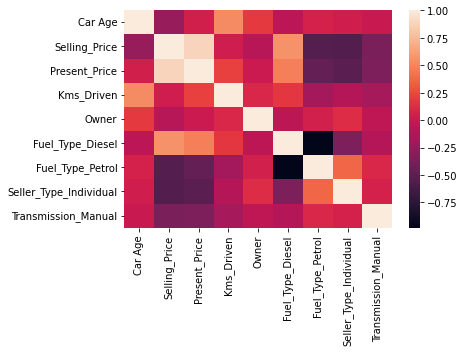

In [71]:
sns.heatmap(final_dataset_conventional_way.corr())

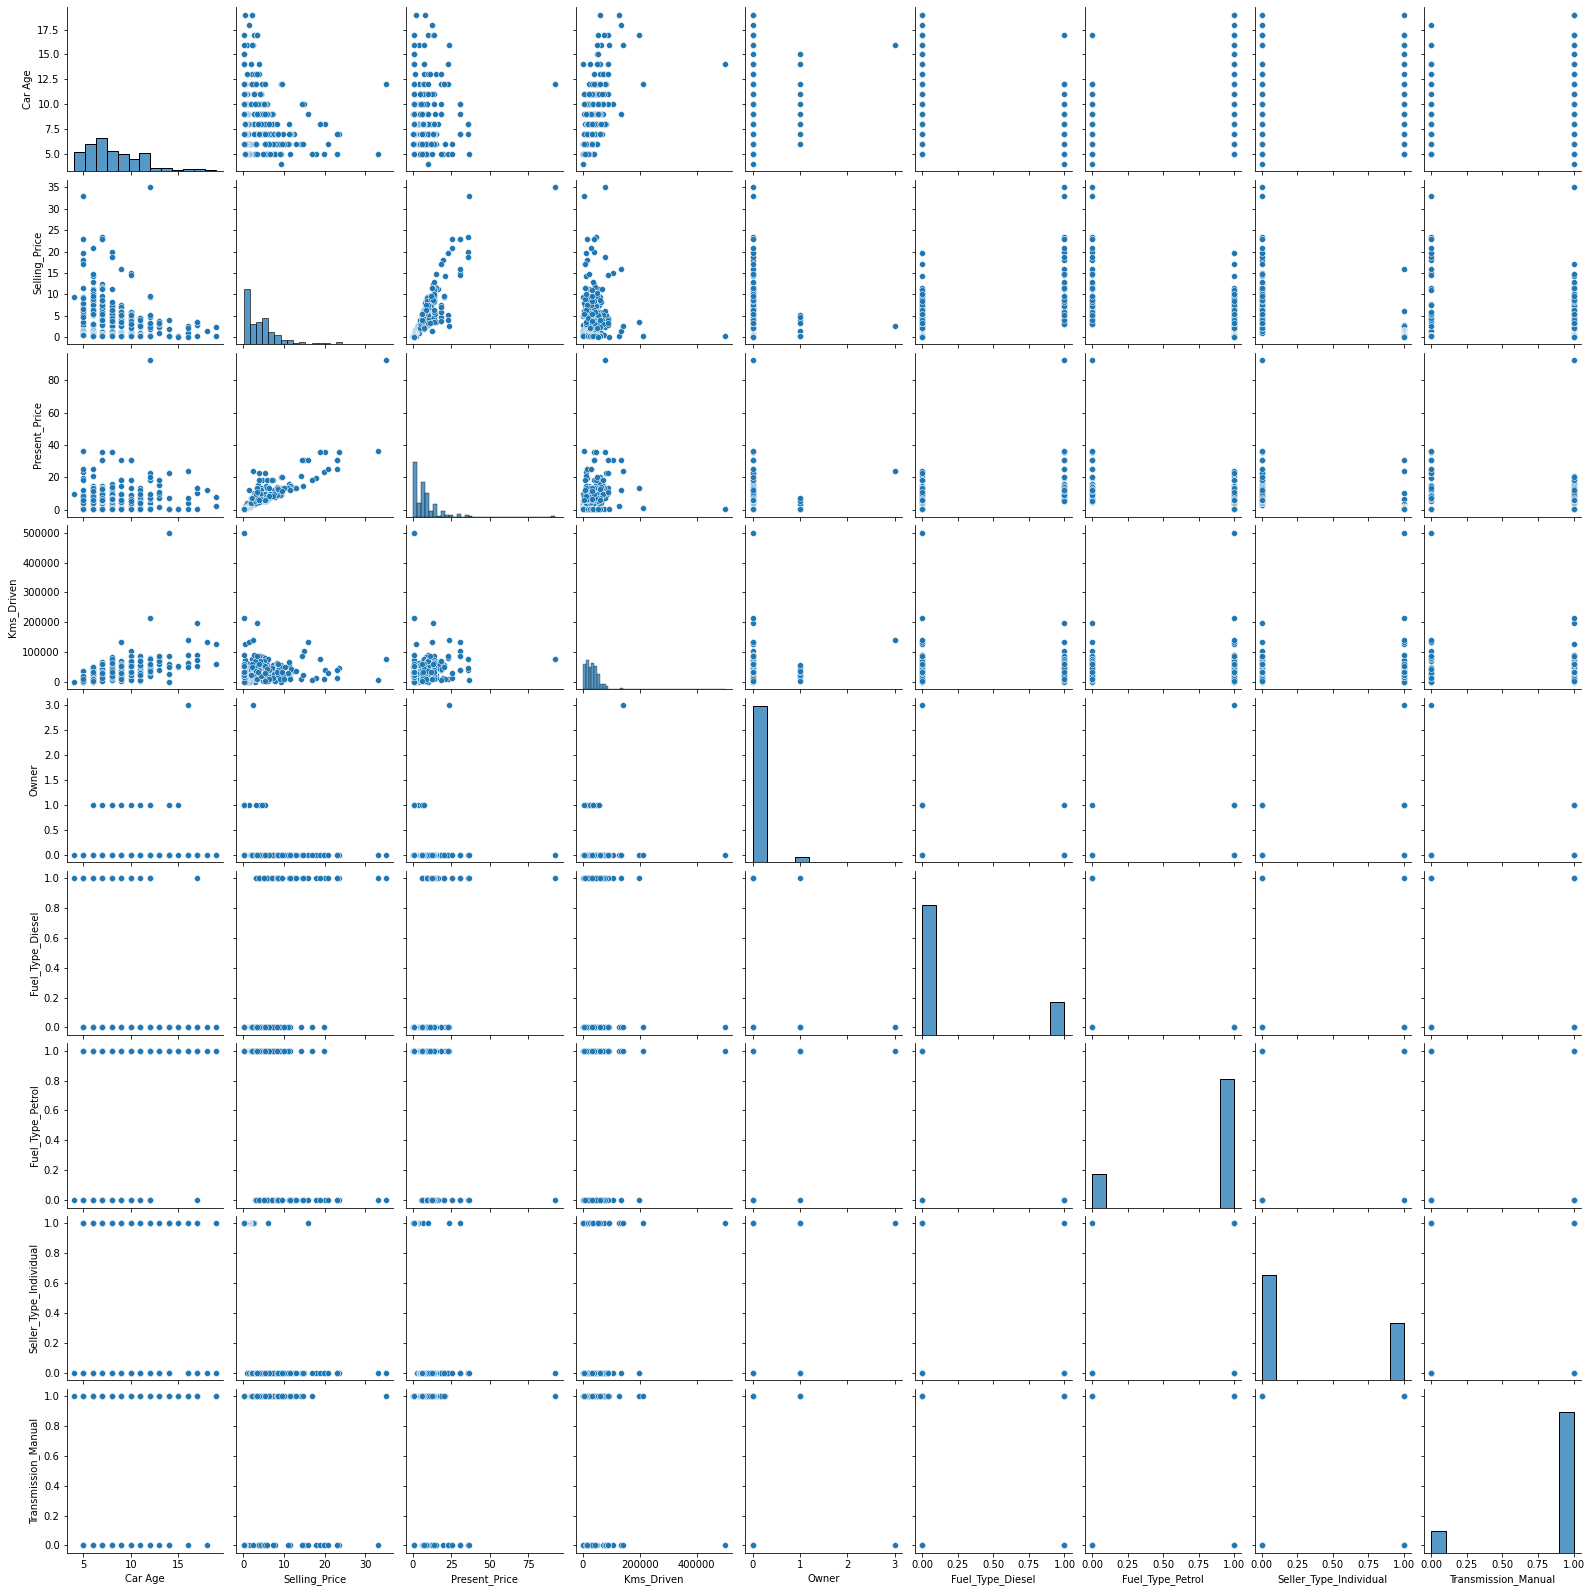

In [72]:
sns.pairplot(final_dataset_conventional_way)

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

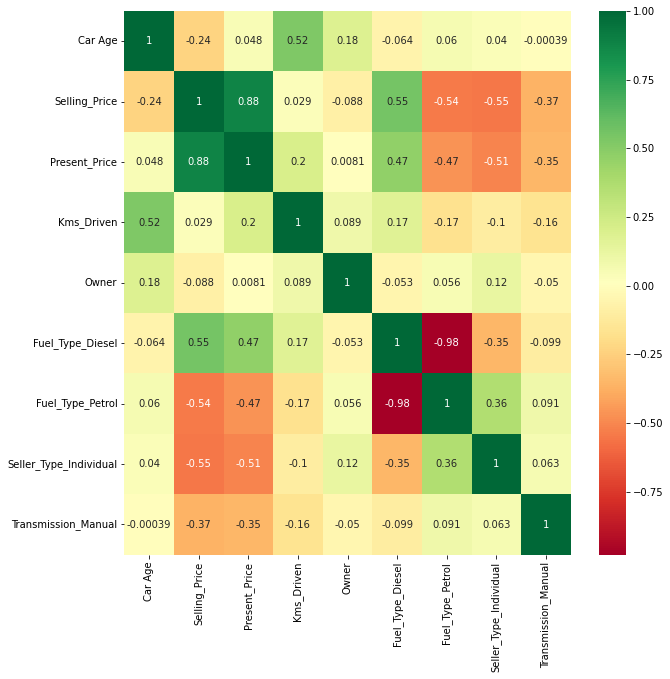

In [75]:
corrmat=final_dataset_conventional_way.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(final_dataset_conventional_way[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [105]:
final_dataset_conventional_way.head()
final_dataset_conventional_way.columns

final_dataset_conventional_way=final_dataset_conventional_way[[ 'Selling_Price','Car Age' ,'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]


In [106]:
X=final_dataset_conventional_way.iloc[:,1:]    # independent
y=final_dataset_conventional_way.iloc[:,0]     #dependent

In [107]:
X.head()

,Car Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8,5.59,27000,0,0,1,0,1
1,9,9.54,43000,0,1,0,0,1
2,5,9.85,6900,0,0,1,0,1
3,11,4.15,5200,0,0,1,0,1
4,8,6.87,42450,0,1,0,0,1


In [108]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [109]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

# using this to find most important features for the model

ExtraTreesRegressor()

In [110]:
print(model.feature_importances_)

[0.07669761 0.39762583 0.0439538  0.00079735 0.21581783 0.01671683
 0.12048611 0.12790465]


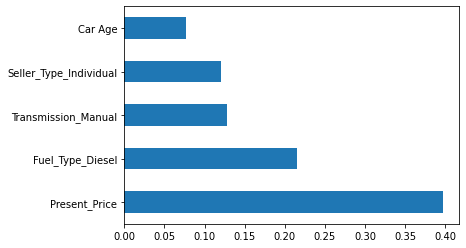

In [111]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [112]:
from sklearn.model_selection import train_test_split


In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [114]:
X_train.shape

(240, 8)

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf_random=RandomForestRegressor()  # using SHift + Tab you can check that params

In [117]:
# Hyperparameters

In [119]:
n_estimaters=[int(x) for x in np.linspace(start=100,stop=1200,num=12)] # No of trees in random forest
max_features=['auto','sqrt']                                           # number of features to conside for every split
max_depth=[int (x) for x in np.linspace(start=5,stop=30,num=6)]         # specifies the depth of the Tree
min_samples_split=[2,5,10,15,100]                                      # minimum no of samples required to split the node
min_sample_leaf=[1,2,5,10]                                             # -//-  required at each leaf node



In [120]:
# Tunned Hyperparameters for Random forest using Randomized search CV
from sklearn.model_selection import RandomizedSearchCV

In [121]:
random_grid={
    'n_estimators': n_estimaters,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [123]:
rf=RandomForestRegressor()

In [124]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [125]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.4s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.6s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.6s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.7s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.8s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.8s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.8s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.1s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.3s
[CV] END max_depth=5, max_feat

C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [126]:
predictions=rf_random.predict(X_test)

In [127]:
predictions

array([ 5.49342383,  5.15691661,  5.07744929,  8.15849257,  3.87803012,
        9.96281618,  6.72417628,  4.46518127,  4.03551888,  5.85386682,
        0.30174798,  1.01346348,  0.8682483 ,  0.52110482,  0.63702863,
        3.44672906,  7.57692841,  1.10841078,  1.26205591,  0.51319859,
       12.08557388,  1.04033181,  7.21778863,  1.13382476,  0.43788704,
        0.34137702,  0.57283291,  4.07374527,  5.58739159,  7.623123  ,
        1.27548115,  4.50580004,  9.54520945,  6.59952345,  6.91392691,
        3.01701577, 10.0913049 ,  0.33867858,  2.82777951,  0.43531026,
        3.15885148,  4.30433166,  6.62984218,  5.03586161,  3.92212425,
        0.66830792,  0.35176915,  3.10679981,  0.64017258,  3.15885148,
        1.15282375,  0.36108059,  5.4032007 ,  2.75117417, 10.54778331,
       21.03973534,  4.57361497,  6.80929288,  0.66162007,  5.55613074,
        7.47319629])

C:\Users\Hp\Anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

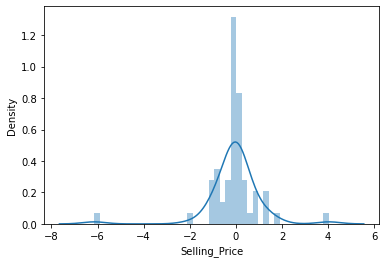

In [130]:
sns.distplot(y_test-predictions)

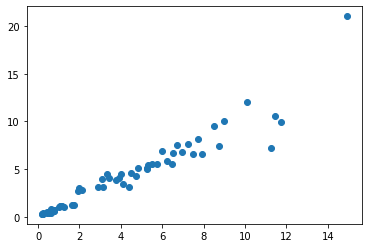

In [131]:
plt.scatter(y_test,predictions)

In [132]:
import pickle

In [133]:
file=open('random_forest_regressor_model.pkl','wb')

In [134]:
pickle.dump(rf_random,file)

In [135]:
# Now Create Requirement.txt using conda command prompt